# Lending Club Case Study

### Problem Statement:
Lending Club is a consumer finance company which specialises in lending various types of loans to customers. If the company approves the loan for an applicant who is not likely to repay the loan, it will cause a financial loss for the company. The case study aims to identify patterns which indicate if a person is likely to default, which the company can then utilize to minimize their losses.

### Approach

The case study is about understanding the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Data
We have been given complete loan data for all approved loans issued through the time period 2007 to 2011.

In [89]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")

In [90]:
#read the data
df=pd.read_csv("loan.csv")

In [91]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [92]:
df.shape

(39717, 111)

### Data Cleaning

#### Columns:

In [93]:
# Calculate percent of null values for each column
percentage_of_null = 100*df.isnull().sum()/len(df)
percentage_of_null

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [94]:
# Discard columns having high percentage of missing values (>40%) as they can skew the analysis
df.drop(df.columns[percentage_of_null>40], axis=1,inplace=True)

In [95]:
# Check number of unique values of each column
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [96]:
# Discard columns having only 1 unique value as they contribute nothing to analysis
for i in df.columns:
    if df[i].nunique()==1:
        df.drop(i, axis=1, inplace = True)

In [97]:
# Discard columns that are not related to pre-approval of loan
# Discard columns containing too many unique values in texts like title, emp_title, url
# Discard funded_amnt_inv as funded_amnt is already present
df.drop(["id", "member_id", "desc", "title", "url", "emp_title", "zip_code", "last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","earliest_cr_line"], axis = 1, inplace = True)

In [98]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### Rows:

In [99]:
# Target variable is loan status
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [100]:
# Discard rows with loan status as current as they contribute nothing to analysis
df=df[~(df.loan_status=='Current')]

In [101]:
df.shape

(38577, 22)

### Treat missing values

In [102]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [103]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [104]:
# Impute emp_length with the mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [105]:
df.revol_util.value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [106]:
# Drop rows with missing values in revol_util as they are negligible
df.dropna(subset=['revol_util'],inplace=True)

In [107]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36189
1.0     1636
2.0        5
Name: count, dtype: int64

In [108]:
# Impute pub_rec_bankruptcies with the mode
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

In [109]:
# Recheck missing values percentage
100*df.isnull().sum()/len(df)

loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Datatype correction

In [110]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [111]:
# Check unique values of every column
df.nunique()

loan_amnt                 869
funded_amnt              1018
term                        2
int_rate                  370
installment             15002
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5210
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
addr_state                 50
dti                      2853
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_util               1088
total_acc                  82
pub_rec_bankruptcies        3
dtype: int64

In [112]:
# Deal with columns with object dtype and lots of unique values
df.int_rate.value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [113]:
df.int_rate=df.int_rate.apply(lambda x: float(x[:-1]))

In [114]:
df.emp_length.value_counts()

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

In [115]:
#Assume emp_length < 1 year as 0 and 10+ years as 10
df.emp_length=df.emp_length.apply(lambda x:0 if x=='< 1 year' else float(x[:2]))

In [116]:
df.revol_util.value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [117]:
df.revol_util=df.revol_util.apply(lambda x: float(x[:-1]))

### Column data correction

In [118]:
df['verification_status'].value_counts()

verification_status
Not Verified       16665
Verified           12196
Source Verified     9666
Name: count, dtype: int64

In [119]:
# Replace 'Source Verified' values with 'Verified' as both have the same meaning
df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [120]:
# Recheck verification status
df['verification_status'].value_counts()

verification_status
Verified        21862
Not Verified    16665
Name: count, dtype: int64

### Separate Numerical and Categorical columns

In [121]:
# Segregate columns related to date time and address state to analyze separately later
extra_cols=['issue_d','addr_state']

In [122]:
# 35 is set as the decisive number as sub_grade has 35 unique values and it is logically a categorical column. 
# Any column with more than 35 unique values are numerical columns for this data set
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].nunique()>35 and i not in extra_cols:
        num_cols.append(i)
    elif df[i].nunique()<=35 and i not in extra_cols:
        cat_cols.append(i)

In [123]:
num_cols

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_util',
 'total_acc']

In [124]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies']

### Outlier Analysis

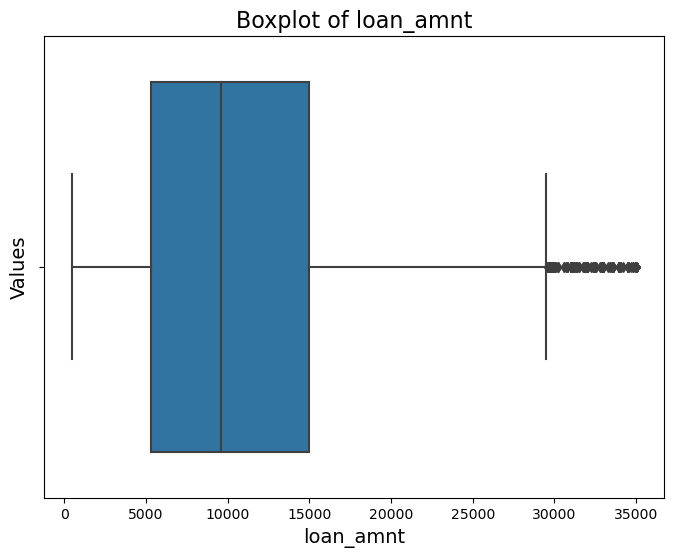

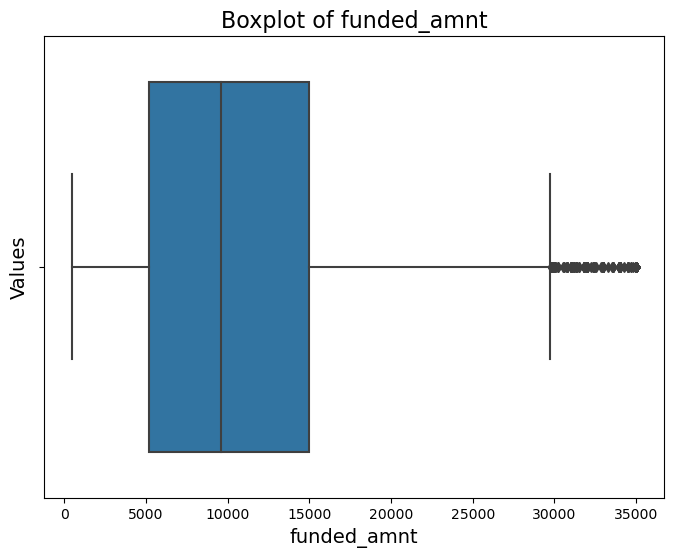

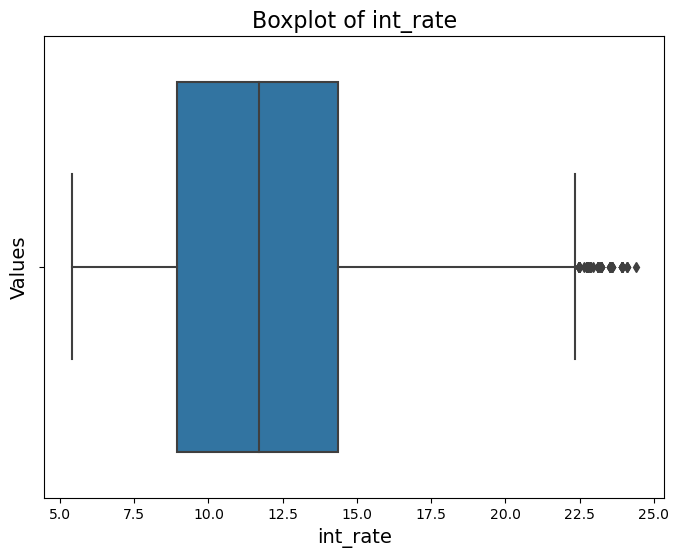

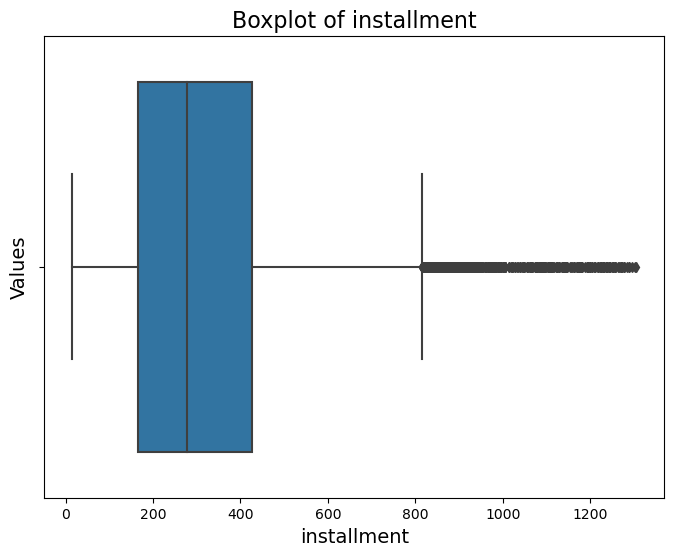

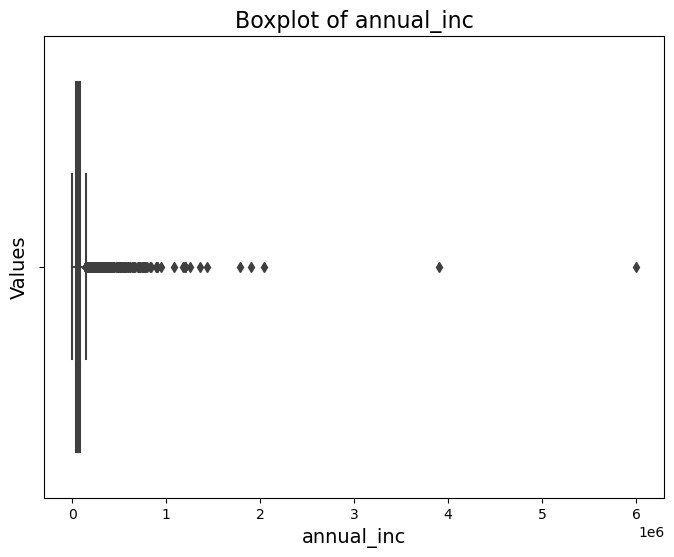

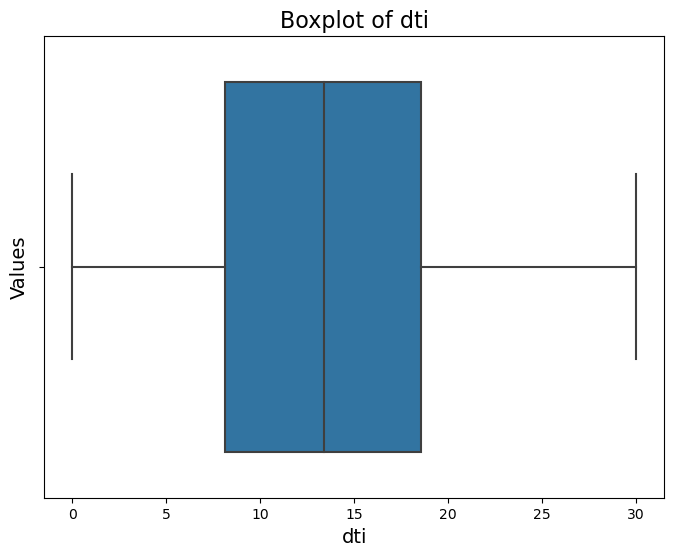

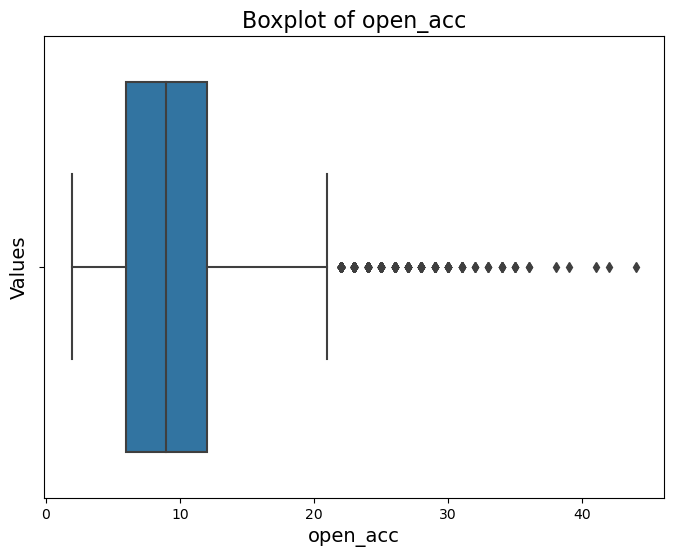

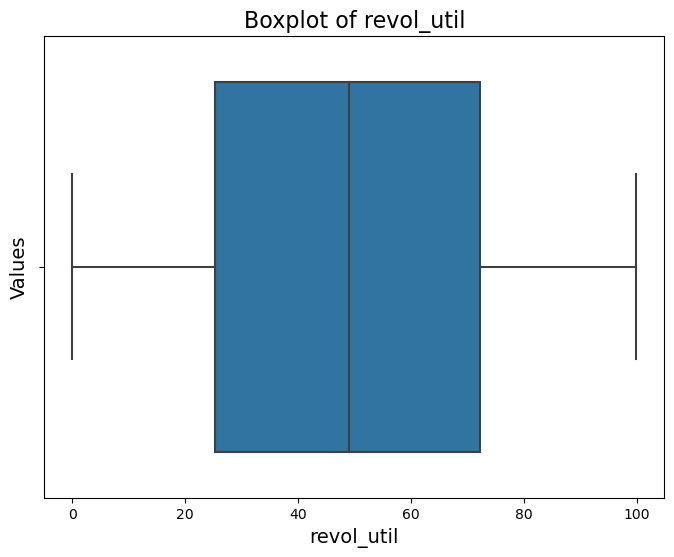

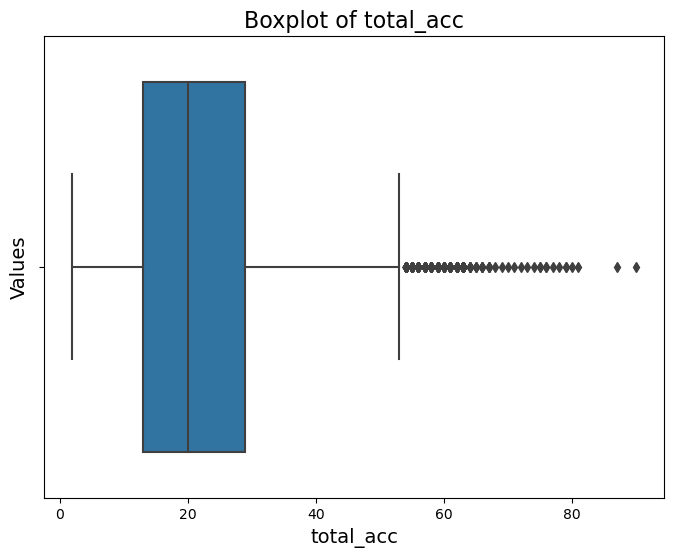

In [125]:
# create boxplots for numerical columns
for col in num_cols:
    
    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])

    # Adding labels and title
    plt.title(f"Boxplot of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Values", fontsize=14)

    # Show the plot
    plt.show()

### *Analysis Results:*
- Loan amount of most of the loan applicants is between 5000 to 15000 USD
- The interest rate on the loan is mostly between 8 percent to 14 percent
- The monthly installment amount on the loan is mostly between 160 to 450
- Annual income has too many values outside the Inter Quartile range
- The debt to income ratio is mostly between 8 to 18
- Number of open accounts are mostly between 5 to 12
- Revolving line utilization rate is mostly between 22 to 78
- Total accounts are mostly between 16 to 30

#### Outlier Treatment

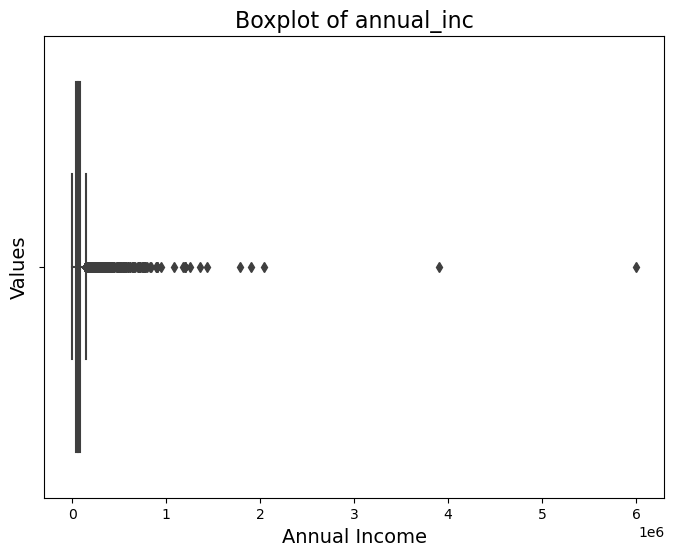

In [126]:
# Boxplot for annual income shows it has lots of outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['annual_inc'])

# Adding labels and title
plt.title(f"Boxplot of {'annual_inc'}", fontsize=16)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.show()

In [127]:
#Annual_inc has outliers so lets filter the data between its lower and upper bounds to get a better understanding

#sort data according to annual_inc
df.sort_values(by='annual_inc', ascending=True, inplace=True)

#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
# Step 3: Calculate IQR
IQR = Q3 - Q1
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the rows with required annual income range between lower and upper bound
df_withoutOutliers = df[(df['annual_inc']>lower_bound) & (df['annual_inc']<upper_bound)]

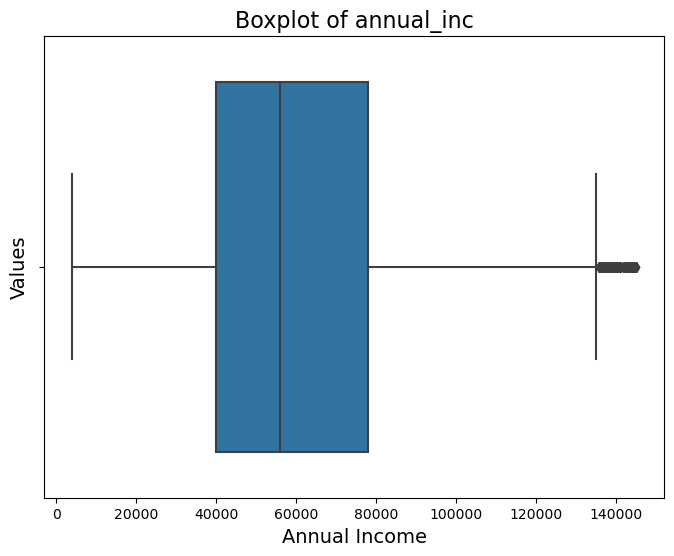

In [128]:
# Boxplot for annual income after filtering data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_withoutOutliers['annual_inc'])

# Adding labels and title
plt.title(f"Boxplot of {'annual_inc'}", fontsize=16)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.show()

### *Analysis results:* 
- Annual income of most of the loan applicants is between 40000 to 80000 USD
- Even though annual income has lots of values outside the Interquartile range, those values will still be considered for the analysis as Annual Income can logically have those values. We'll analyse them by binning later.

### Segmented Univariate Analysis

#### Lets analyze data related to the target column, that is loan applicants with charged off loan status(defaulters)

In [129]:
# Create dataframe for the loan defaulters
df_defaulters=df[df.loan_status=='Charged Off']
df_defaulters.shape

(5611, 22)

#### Plot countplots for the categorical columns in the loan defaulters dataframe

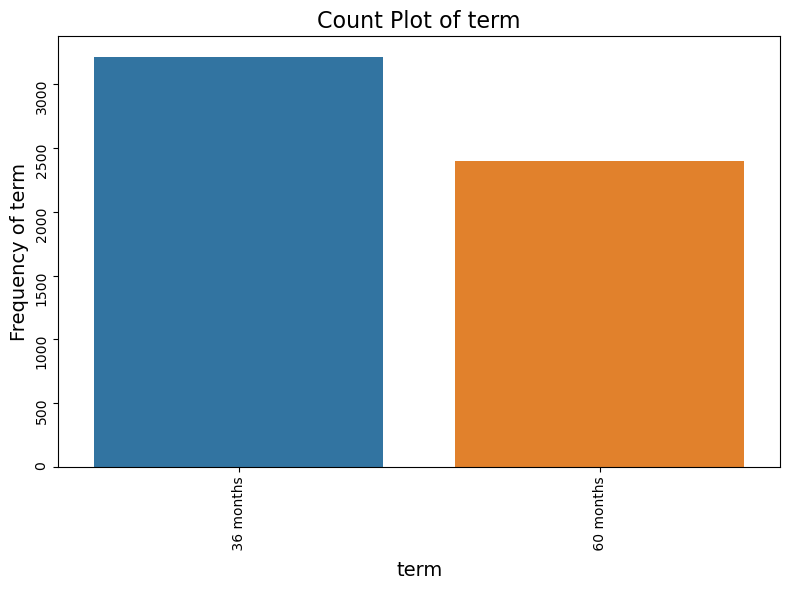

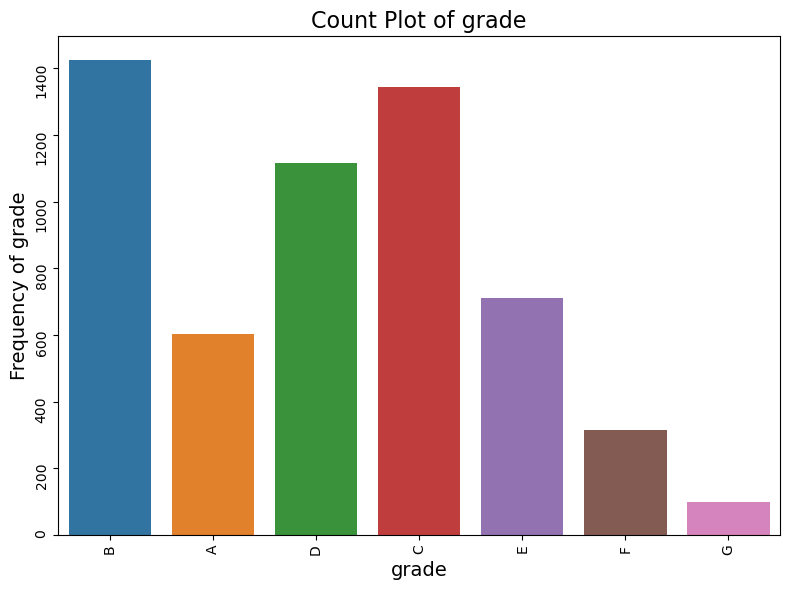

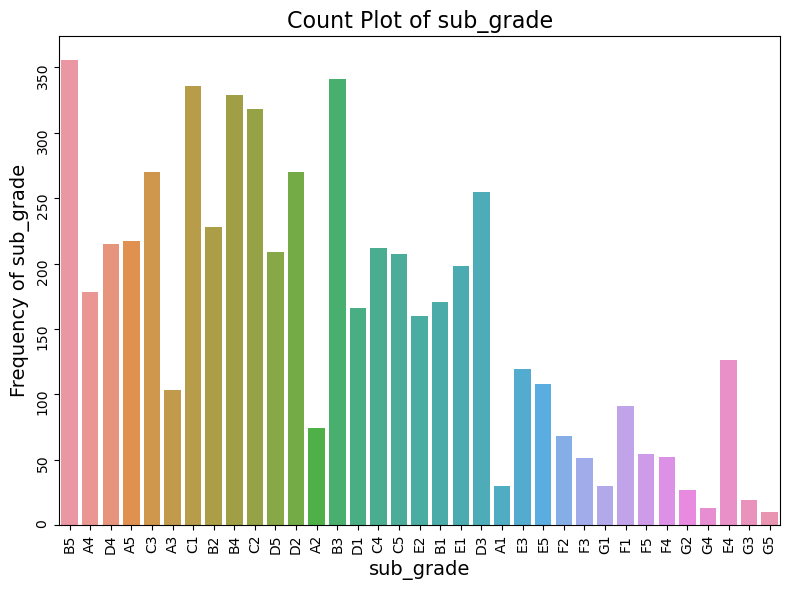

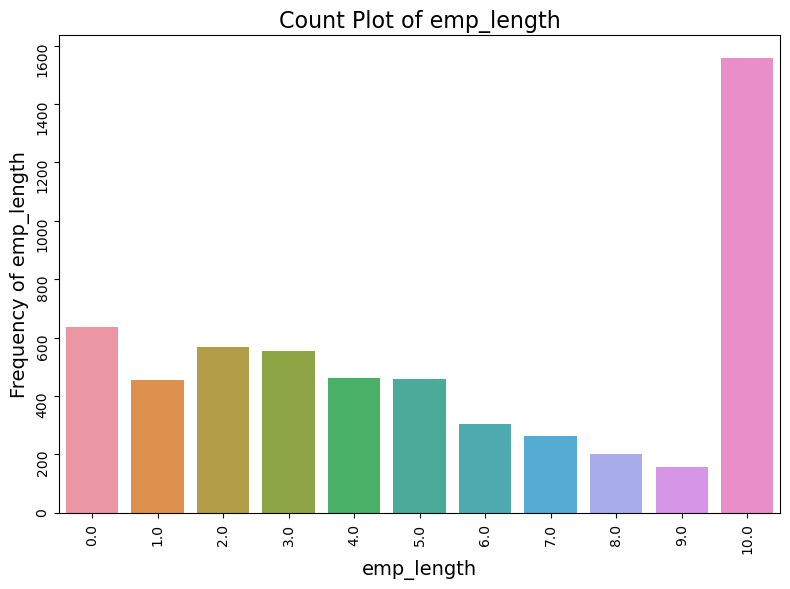

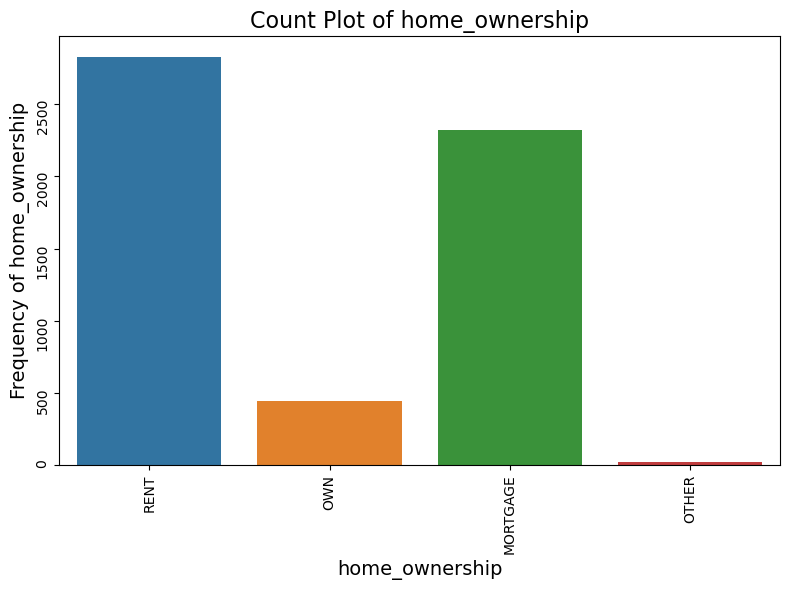

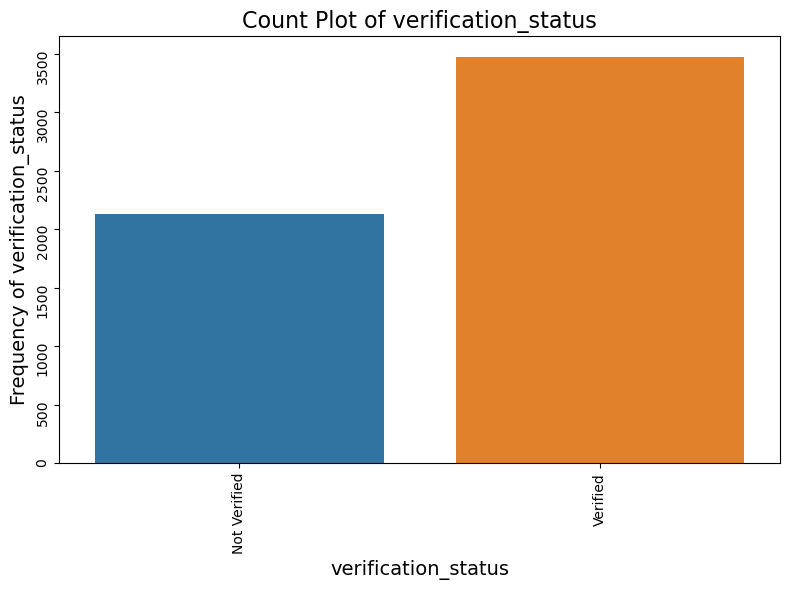

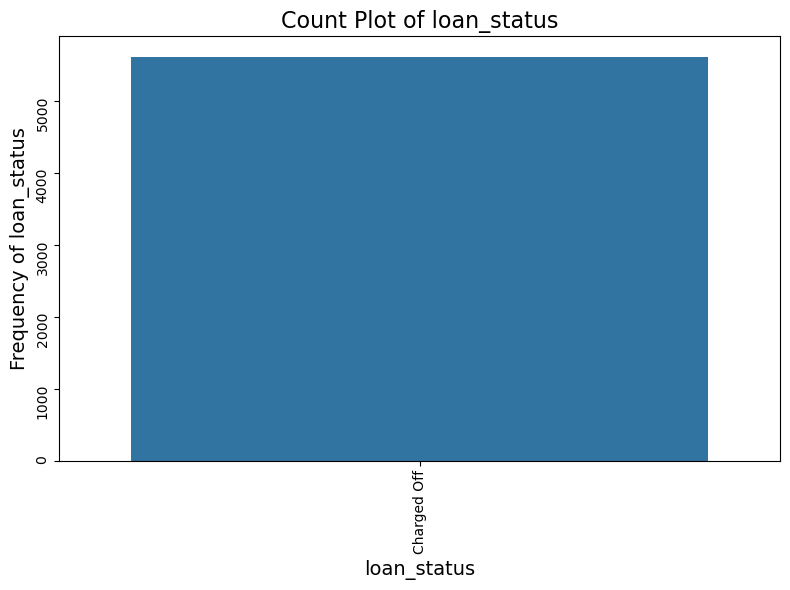

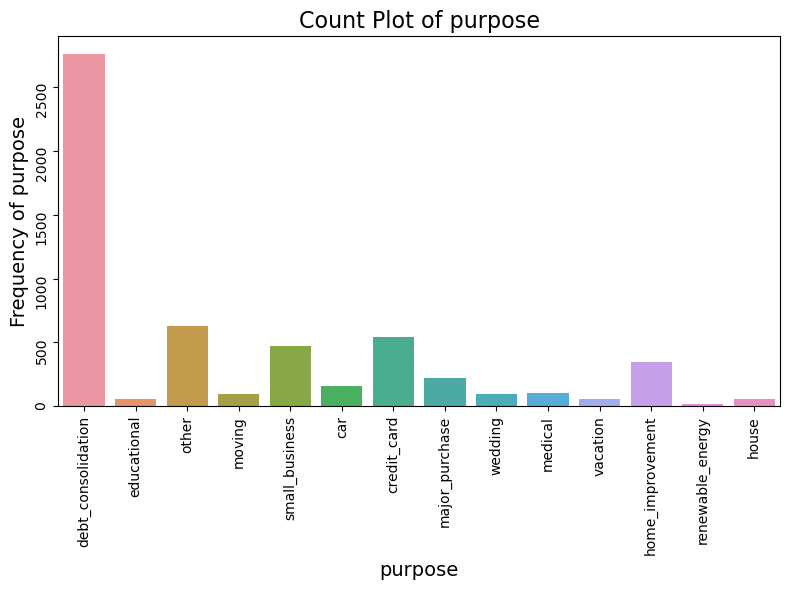

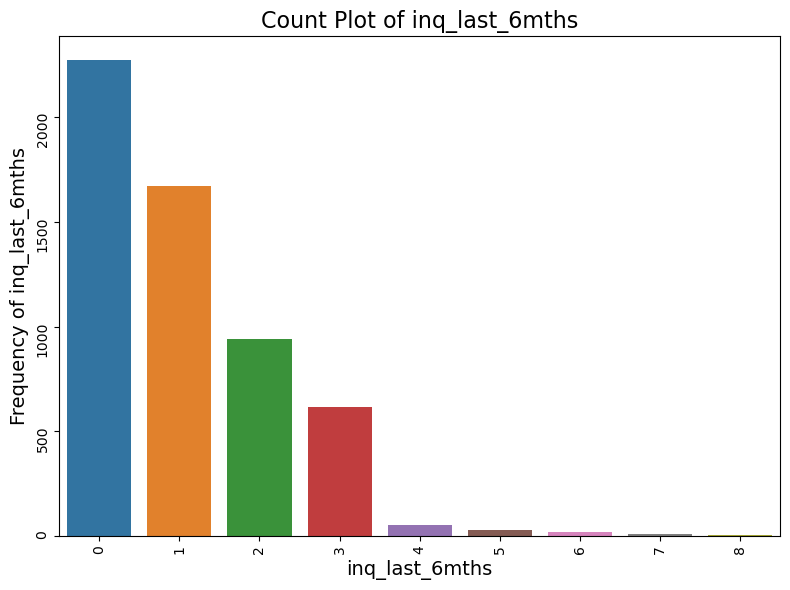

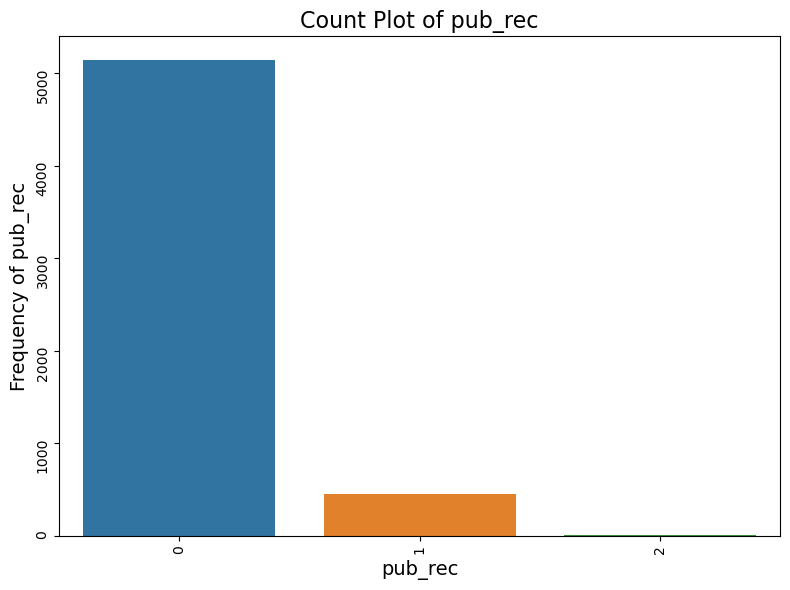

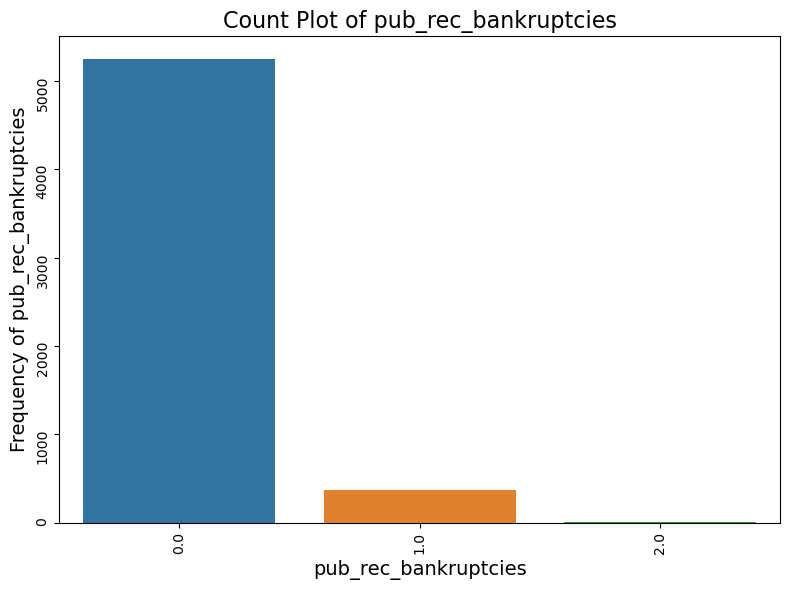

In [130]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_defaulters[col])
    
    # Set title and labels
    plt.title(f'Count Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel(f'Frequency of {col}', fontsize=14)
    
    # Rotate labels
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

### *Analysis Results:*
#### Most defaulters had the following characteristics
- Applied for Short-term loans with a duration of 36 months
- Loan grade was B or C
- Loan subgrade was B5, C1, B4 or B3
- Employed for more than 10 years
- Lived in rented houses
- Had verified income sources
- Made no inquiries in past 6 months(excluding auto and mortgage inquiries)
- Debt consolidation was the primary loan purpose
- No derogatory public records
- No public record bankruptcies

### Binning

#### Group continuous numerical values into discrete categories called buckets

In [131]:
# Create a function to bucket
def bucket_col(df, column, thresholds, labels):
    # Create the bucketed column based on the thresholds
    df[f'{column}_bucket'] = pd.cut(df[column], bins=[0] + thresholds + [float('inf')], labels=labels, right=False)
    
    # Return the bucketed column
    return df[f'{column}_bucket']

In [132]:
# Binning Loan Amount
loan_amount_bins = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df_defaulters['loan_amnt_bucket'] = bucket_col(df_defaulters, 'loan_amnt', loan_amount_bins, loan_amount_labels)

In [133]:
# Binning for Interest Rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df_defaulters['int_rate_bucket'] = bucket_col(df_defaulters, 'int_rate', int_rate_bins, int_rate_labels)

In [134]:
# Binning Annual Income
annual_inc_bins = [40000, 50000, 60000, 70000, 80000,100000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - 100k', '100k - above']
df_defaulters['annual_inc_bucket'] = bucket_col(df_defaulters, 'annual_inc', annual_inc_bins, annual_inc_labels)

In [135]:
# Binning total funded amount
funded_amnt_bins = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
df_defaulters['funded_amnt_bucket'] = bucket_col(df_defaulters, 'funded_amnt', funded_amnt_bins, funded_amnt_labels)

In [136]:
# Binning Debt to Income
dti_bins = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_defaulters['dti_bucket'] = bucket_col(df_defaulters, 'dti', dti_bins, dti_labels)

#### Plot countplots for the buckets

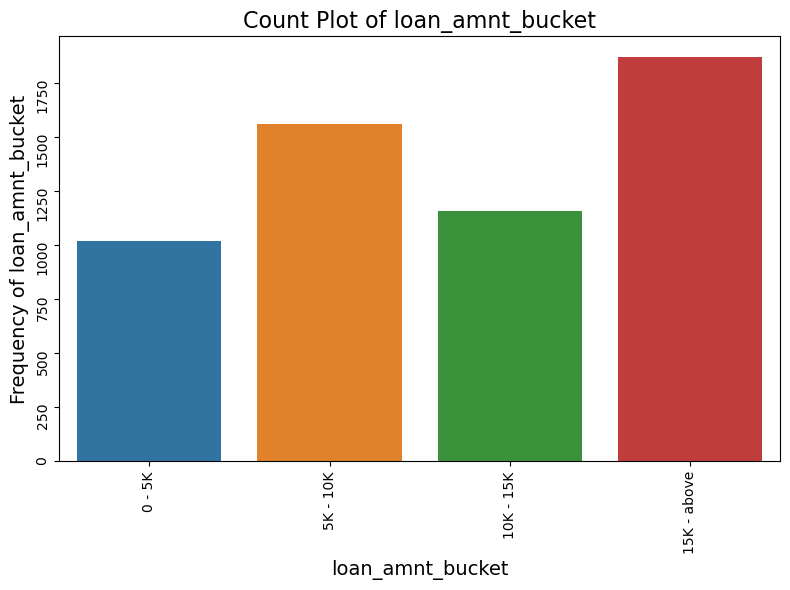

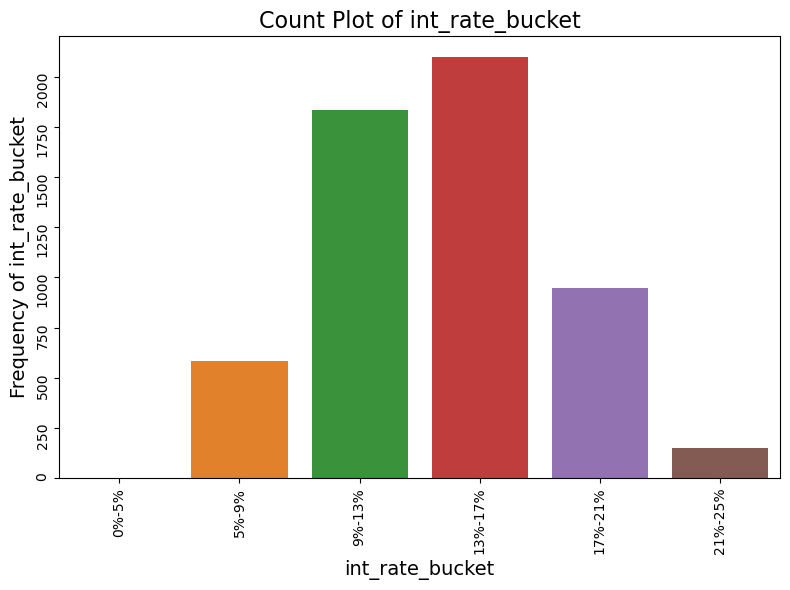

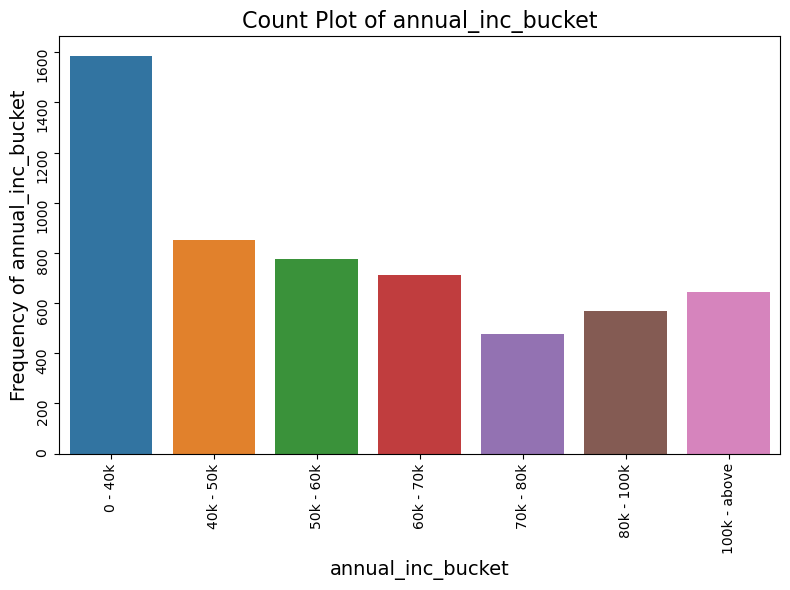

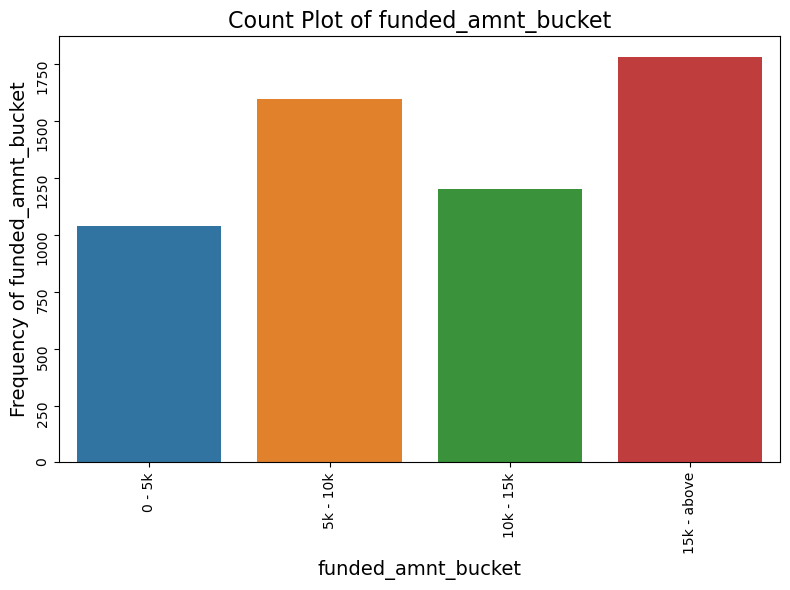

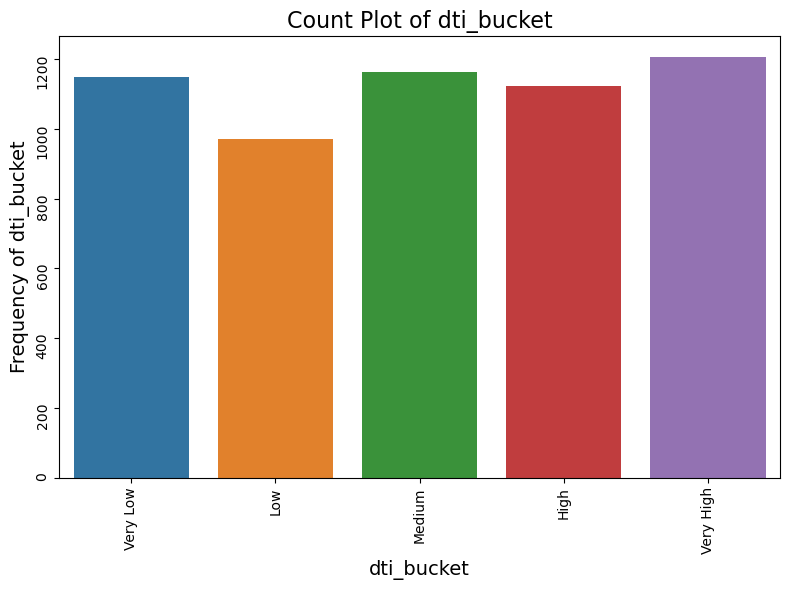

In [137]:
buckets=['loan_amnt_bucket','int_rate_bucket','annual_inc_bucket','funded_amnt_bucket','dti_bucket']
for col in buckets:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_defaulters[col])
    
    # Set title and labels
    plt.title(f'Count Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel(f'Frequency of {col}', fontsize=14)
    
    # Rotate labels
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

### *Analysis Results:*
#### Most defaulters had the following characteristics:
- Annual salaries less than 40,000 USD
- Interest rate between 13% to 17%
- Loan amounts of 15000 USD and above
- Amounts funded of 15,000 USD and above
- Very high debt-to-income ratios

#### Analyse the frequency distribution of Installments column

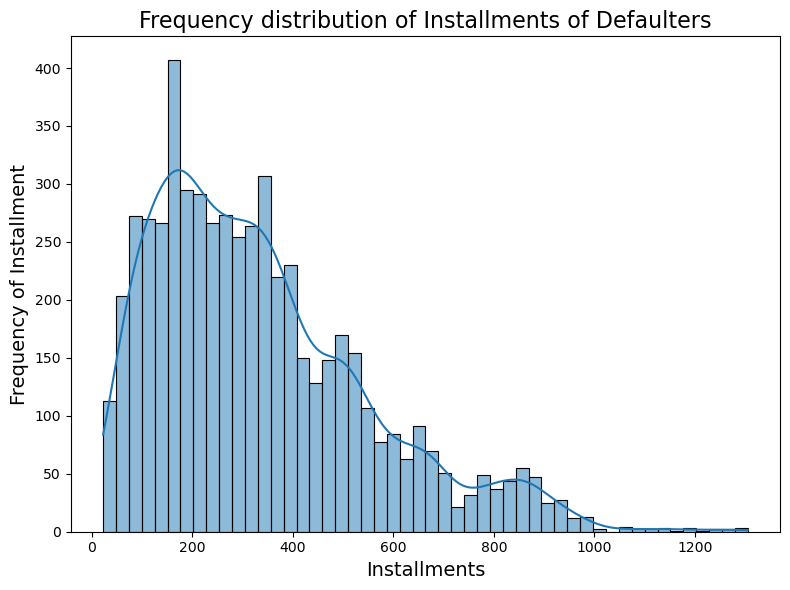

In [138]:
# Plot histogram of Installments column
plt.figure(figsize=(8, 6))
sns.histplot(df_defaulters['installment'], bins=50, kde=True)

# Set the title and labels
plt.title('Frequency distribution of Installments of Defaulters', fontsize=16)
plt.xlabel('Installments', fontsize=14)
plt.ylabel('Frequency of Installment', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#### Analyse the frequency distribution of Address State column

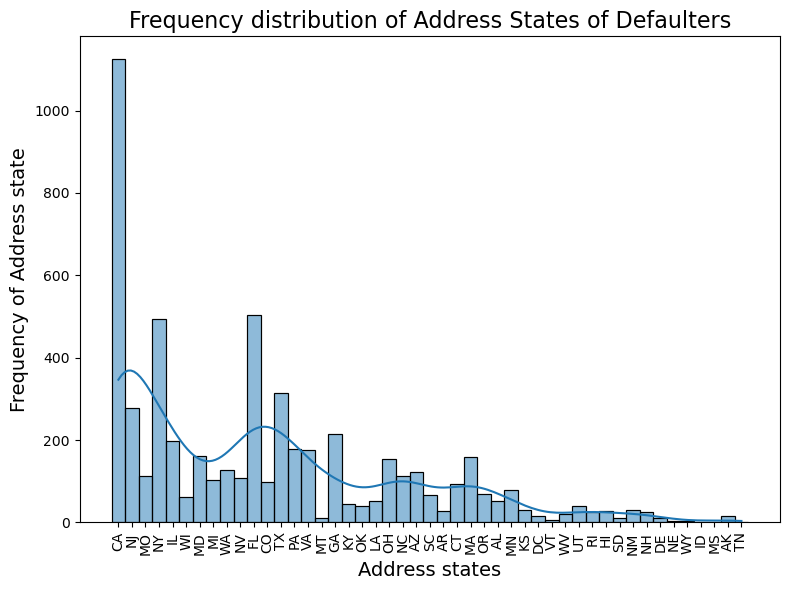

In [139]:
# Plot histogram of Address State column
plt.figure(figsize=(8, 6))
sns.histplot(df_defaulters['addr_state'], bins=50, kde=True)

# Set the title and labels
plt.title('Frequency distribution of Address States of Defaulters', fontsize=16)
plt.xlabel('Address states', fontsize=14)
plt.ylabel('Frequency of Address state', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Results:*
#### Most defaulters had:
- Monthly installment amounts in the range of 160 to 440 USD
- Most lived in California, Florida or New York

### Bivariate Analysis

#### Analyze categorical columns against the Loan Status(target) column

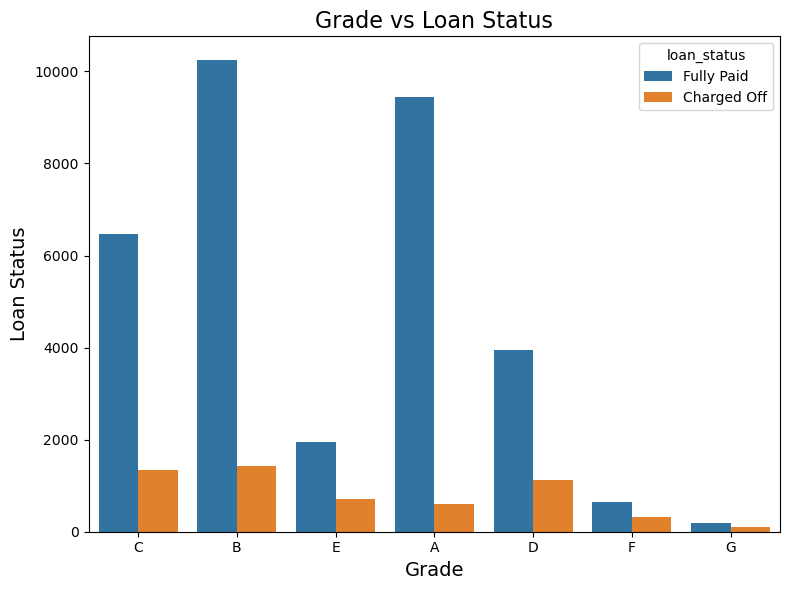

In [140]:
# Plot countplot for Grade vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='grade',
    hue='loan_status',
)

# Set the title and labels
plt.title('Grade vs Loan Status', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Result:*
- Loan applicants of Grades B and C contribute most to "Charged Off" loans

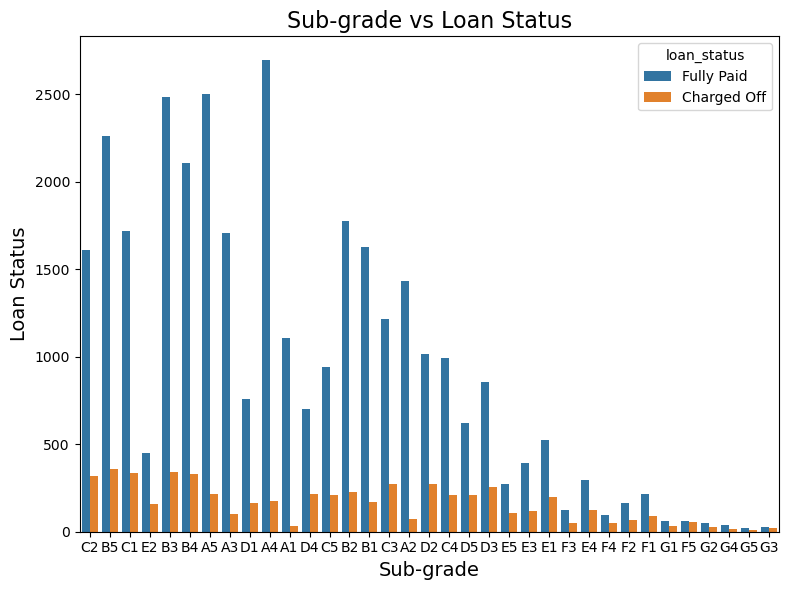

In [141]:
# Sub-Grade vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='sub_grade',
    hue='loan_status',
)

# Set the title and labels
plt.title('Sub-grade vs Loan Status', fontsize=16)
plt.xlabel('Sub-grade', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Results:*
- Loan applicants from Sub-grades B5, B3, C1 and B4 contribute most to "Charged Off" loans

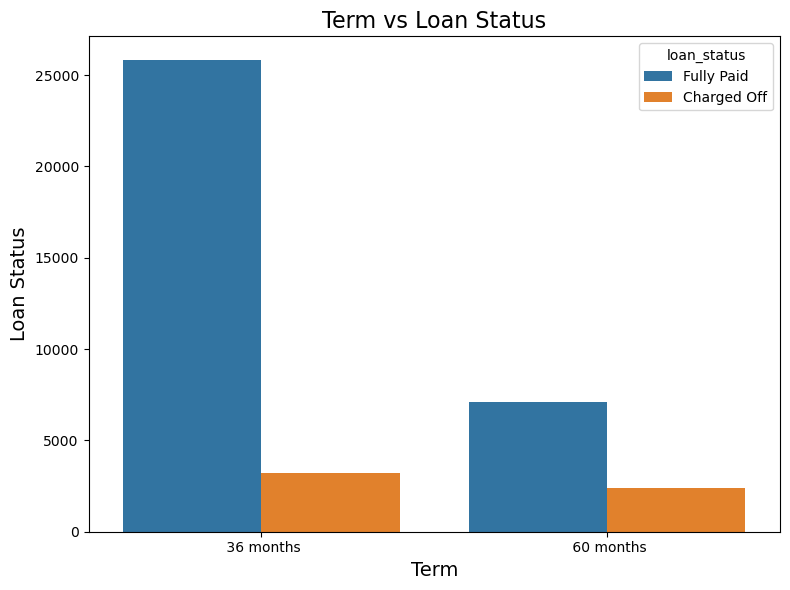

In [142]:
#Term vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='term',
    hue='loan_status',
)

# Set the title and labels
plt.title('Term vs Loan Status', fontsize=16)
plt.xlabel('Term', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Result:* 
- Short-term loans with a duration of 36 months contribute most to "Charged Off" loans

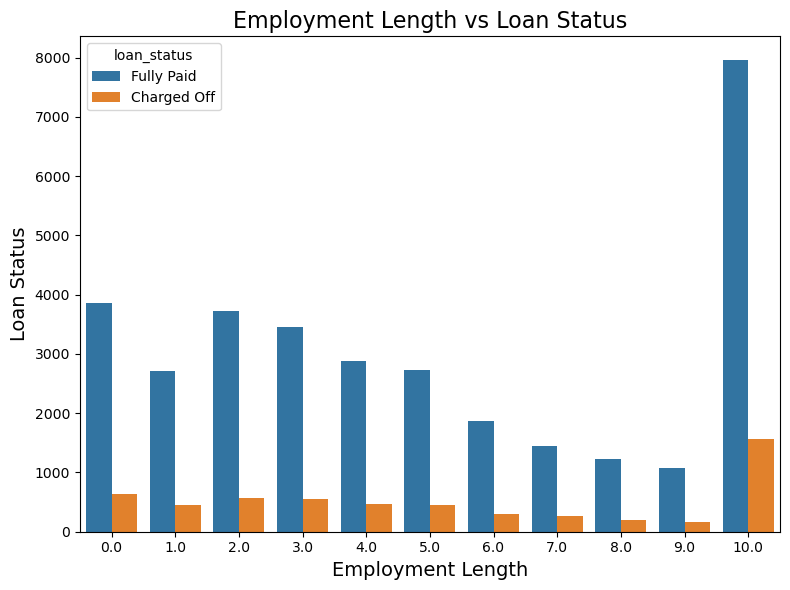

In [143]:
# Employment Length vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='emp_length',
    hue='loan_status',
)

# Set the title and labels
plt.title('Employment Length vs Loan Status', fontsize=16)
plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Result:* 
- Loan applicants with more than 10 years of experience are more likely to apply for loans as well as most likely to default

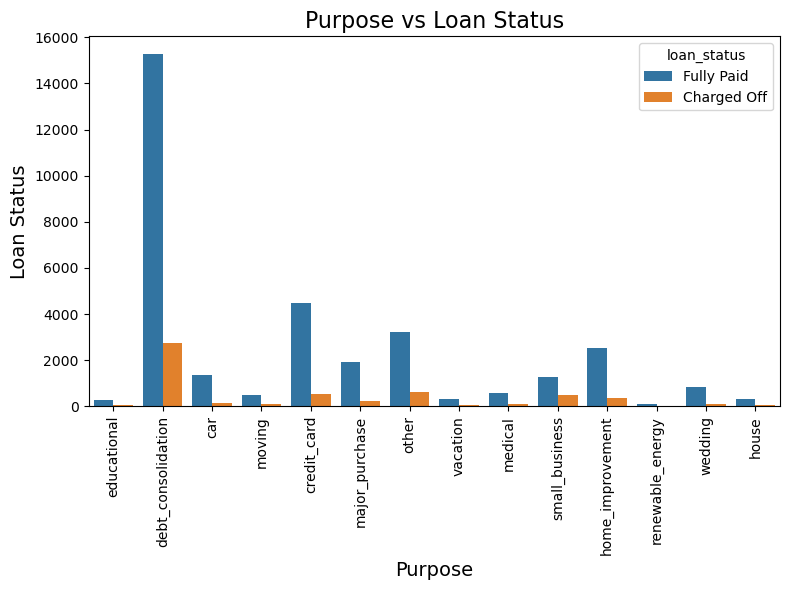

In [144]:
# Purpose vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='purpose',
    hue='loan_status',
)

# Set the title and labels
plt.title('Purpose vs Loan Status', fontsize=16)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Result:* 
- Most defaulters have Debt consolidation as purpose of the loan

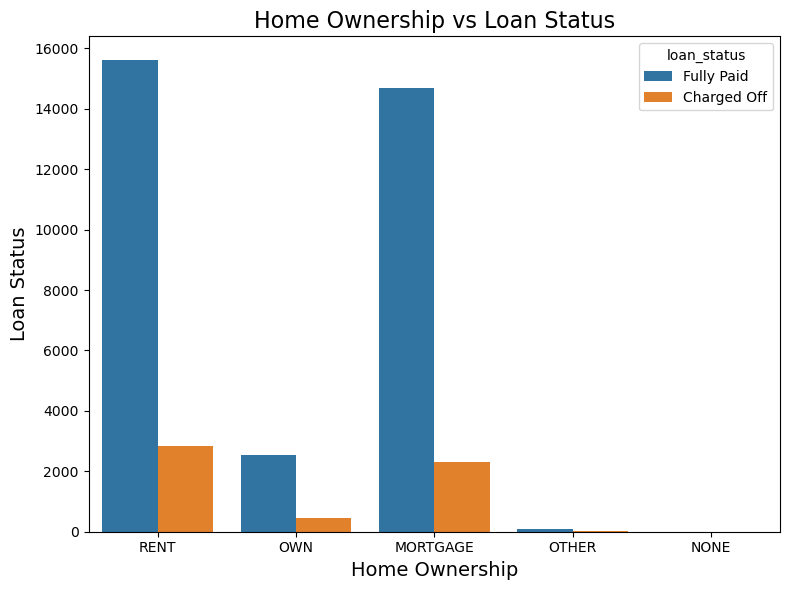

In [145]:
# Home Ownership vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='home_ownership',
    hue='loan_status',
)

# Set the title and labels
plt.title('Home Ownership vs Loan Status', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Result:*
- Most defaulters lived in a rented or mortgaged house

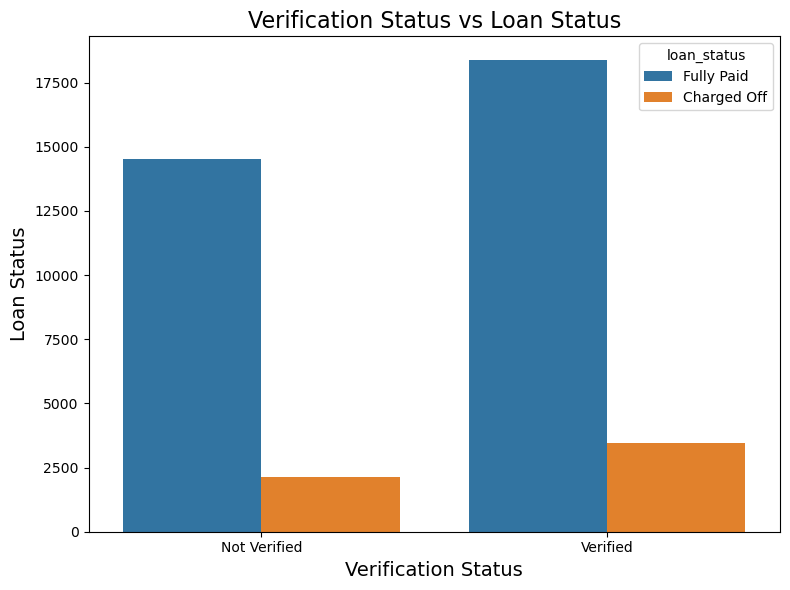

In [146]:
#Verification Status vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='verification_status',
    hue='loan_status',
)

# Set the title and labels
plt.title('Verification Status vs Loan Status', fontsize=16)
plt.xlabel('Verification Status', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### *Analysis Results:* 
- Most loan applicants had verified income sources and most defaulters also had verified income sources

### Bivariate Analysis of Derived metrics from Date column

#### We have already analyzed numerical columns of defaulters by creating buckets so now lets analyze the date time column

In [147]:
# Derive month and year from the datetime column by converting issue_d to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Extract year and month into separate columns
df['issue_d_year'] = pd.to_datetime(df['issue_d']).dt.year
df['issue_d_month'] = pd.to_datetime(df['issue_d']).dt.month

#### Plot issued month and issued year versus loan status

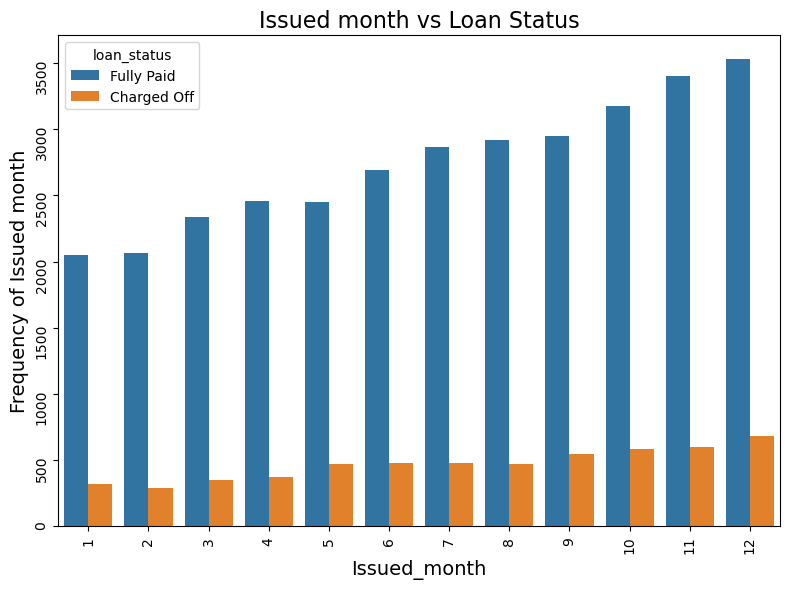

In [148]:
# Issued month vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='issue_d_month',
    hue='loan_status',
)
    
# Set title and labels
plt.title('Issued month vs Loan Status', fontsize=16)
plt.xlabel('Issued_month', fontsize=14)
plt.ylabel('Frequency of Issued month', fontsize=14)
    
# Rotate labels
plt.xticks(rotation=90)
plt.yticks(rotation=90)
    
plt.tight_layout()
plt.show()

### *Analysis Results:* 
- The number of loans taken increased over the months, as did the number of defaulted loans.

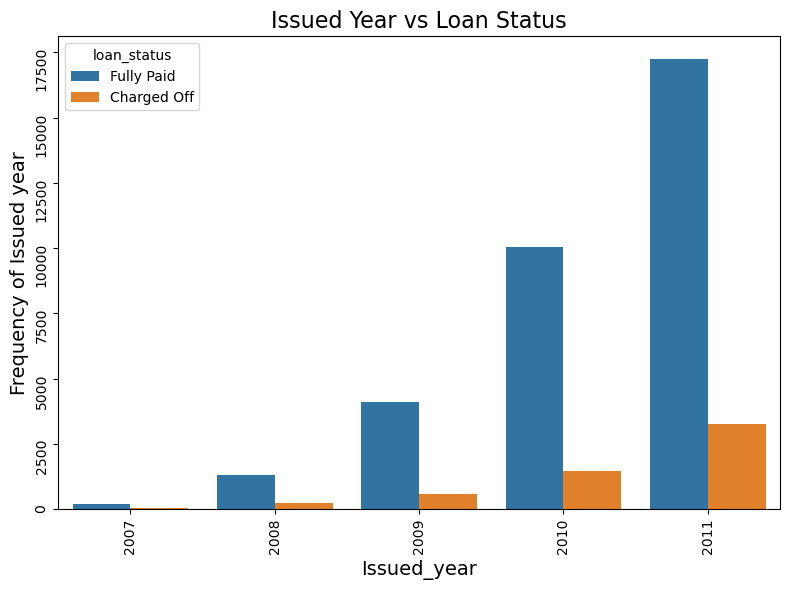

In [149]:
# Issued year vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='issue_d_year',
    hue='loan_status',
)
    
# Set title and labels
plt.title('Issued Year vs Loan Status', fontsize=16)
plt.xlabel('Issued_year', fontsize=14)
plt.ylabel('Frequency of Issued year', fontsize=14)
    
# Rotate labels
plt.xticks(rotation=90)
plt.yticks(rotation=90)
    
plt.tight_layout()
plt.show()

### *Analysis Results:*
- The number of loans taken increased from 2007 to 2011, as did the number of defaulted loans.

## Conclusions from the Analysis:
### The company should be careful when giving loans of the following nature:
- Short-term loans with a duration of 36 months
- Loan grade B or C
- Loan subgrade B5, C1, B4 or B3
- Debt consolidation is the primary loan purpose
- Interest rate between 13% to 17%
- Applied for Loan amounts of 15000 USD and above
- Loans taken towards the end of the year

### The company should be careful when giving loans to applicants with the following characteristics:
- Employed for more than 10 years
- Live in rented or mortgaged houses
- Made no inquiries in past 6 months(excluding auto and mortgage inquiries)
- With annual salary less than 40000 USD
- Live in California, Florida or New York
- Have very high debt-to-income ratios